# Example usage for clustering in "movekit"

In [1]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [4]:
import os
os.chdir('..')
import src.movekit.io as imp
import src.movekit.feature_extraction as fe
import src.movekit.clustering as cl

### Read in CSV file and preprocess

In [2]:
# Enter path to CSV file
path = "./datasets/fish-5.csv"

In [3]:
# Read in CSV file and preprocess
data = mkit.read_data(path)
preprocessed_data = mkit.preprocess(data)


 Number of missing values = y            0
x            0
animal_id    0
time         0
dtype: int64



In [38]:
feats = mkit.extract_features(preprocessed_data)

In [6]:
feats

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped
0,1,312,405.29,417.76,0.000000,0.000000,0.000000,0.000000,0
1,2,312,405.31,417.37,0.390512,0.000000,0.000000,-87.064327,0
2,3,312,405.31,417.07,0.300000,0.000000,0.000000,-90.000000,0
3,4,312,405.30,416.86,0.210238,0.000000,0.000000,-92.726311,0
4,5,312,405.29,416.71,0.150333,0.000000,0.000000,-93.814075,0
5,6,312,405.27,416.61,0.101980,0.000000,0.000000,-101.309932,0
6,7,312,405.27,416.54,0.070000,0.000000,0.000000,-90.000000,0
7,8,312,405.27,416.49,0.050000,0.000000,0.000000,-90.000000,0
8,9,312,405.31,416.37,0.126491,0.000000,0.000000,-71.565051,0
9,10,312,405.38,416.27,0.122066,0.152162,0.000000,-55.007980,1


In [58]:
X = feats.loc[:,["distance","average_speed", "average_acceleration","direction","stopped"]]

In [59]:
from pyod.models.knn import KNN

def outlier_detection(inp_data, contamination = 0.01, n_neighbors = 5, method = "mean", metric = "euclidean"):
    clf = KNN(contamination = contamination, n_neighbors = n_neighbors, method = method, metric = metric)
    clf.fit(inp_data)
    scores_pred = clf.predict(inp_data)
    inp_data.insert(2, "outlier", scores_pred)
    return inp_data

In [60]:
outlier_detection(X)

,distance,average_speed,outlier,average_acceleration,direction,stopped
0,0.000000,0.000000,0,0.000000,0.000000,0
1,0.390512,0.000000,0,0.000000,-87.064327,0
2,0.300000,0.000000,0,0.000000,-90.000000,0
3,0.210238,0.000000,0,0.000000,-92.726311,0
4,0.150333,0.000000,0,0.000000,-93.814075,0
5,0.101980,0.000000,0,0.000000,-101.309932,0
6,0.070000,0.000000,0,0.000000,-90.000000,0
7,0.050000,0.000000,0,0.000000,-90.000000,0
8,0.126491,0.000000,0,0.000000,-71.565051,0
9,0.122066,0.152162,0,0.000000,-55.007980,1


In [54]:
scores[scores["outlier"]==1]

,distance,average_speed,outlier,average_acceleration,direction,stopped
1877,4.623505,3.882246,1,0.024184,2.231175,0
1878,4.516658,4.069939,1,0.018769,6.228122,0
1881,4.022400,4.293873,1,0.004060,11.617220,0
1882,3.994621,4.303061,1,0.000919,14.349332,0
1883,3.956931,4.286438,1,-0.001662,17.198541,0
1984,2.773536,1.059626,1,0.025933,87.106646,0
1985,3.414235,1.386731,1,0.032711,87.145975,0
1988,4.570831,2.539209,1,0.042380,83.341425,0
1989,4.498855,2.954890,1,0.041568,82.464268,0
1990,4.230662,3.298754,1,0.034386,79.513455,0


In [48]:
scores

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
np.count_nonzero(scores_pred == 1)/len(scores_pred)

0.0328

#### Obtain a matrix, based on dynamic time warping
Each Animal-ID is displayed in the indices, the entries reflect the euclidean distances of the animal's trajectories.

In [5]:
dtw_matrix(preprocessed_data)

,312,511,607,811,905
312,0.000000,30843.085403,32859.600139,42461.524553,37916.447829
511,30843.085403,0.000000,26931.014323,47116.708116,20967.960073
607,32859.600139,26931.014323,0.000000,39859.787924,35711.718898
811,42461.524553,47116.708116,39859.787924,0.000000,38379.806433
905,37916.447829,20967.960073,35711.718898,38379.806433,0.000000


#### Time series clustering for absolute features
Function can also be executed without extracted features, performing a standard feature-extraction before.

In [6]:
feats = mkit.extract_features(preprocessed_data)

In [8]:
ts_cluster(feats, 3).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,cluster,ClustCenter,centroid_distance,centroid_average_speed,centroid_average_acceleration,centroid_direction,centroid_stopped
0,1,312,405.29,417.76,0.000000,0.0,0.0,0.000000,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
1,1,511,369.99,428.78,0.000000,0.0,0.0,0.000000,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
2,1,607,390.33,405.89,0.000000,0.0,0.0,0.000000,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
3,1,811,445.15,411.94,0.000000,0.0,0.0,0.000000,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
4,1,905,366.06,451.76,0.000000,0.0,0.0,0.000000,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
5,2,312,405.31,417.37,0.390512,0.0,0.0,-87.064327,0,2,"[0.21761692167266206, 0.0, 0.0, -11.8146888653...",0.217617,0.0,0.0,-11.814689,0.0
6,2,511,370.01,428.82,0.044721,0.0,0.0,63.434949,0,2,"[0.21761692167266206, 0.0, 0.0, -11.8146888653...",0.217617,0.0,0.0,-11.814689,0.0
7,2,607,390.25,405.89,0.080000,0.0,0.0,180.000000,0,1,"[0.07999999999998408, 0.0, 0.0, 180.0, 0.0]",0.080000,0.0,0.0,180.000000,0.0
8,2,811,445.48,412.26,0.459674,0.0,0.0,44.118596,0,0,"[0.3298368986912307, 0.0, 0.0, 112.05929800170...",0.329837,0.0,0.0,112.059298,0.0
9,2,905,365.86,451.76,0.200000,0.0,0.0,180.000000,0,0,"[0.3298368986912307, 0.0, 0.0, 112.05929800170...",0.329837,0.0,0.0,112.059298,0.0


#### Getting the heading difference
Calculate the difference in degrees between the animal's direction and the centroid's direction for each timestep. Stronger gain in y gives positive difference, weaker gain in y gives negative difference, since constant y is defined to be 0 degrees.

In [10]:
get_heading_difference(feats).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,x_centroid,y_centroid,medoid,distance_to_centroid,centroid_direction,heading_difference
0,1,312,405.29,417.76,0.000000,0.0,0.0,0.000000,0,395.364,423.226,312,11.331,NaN,NaN
1,1,511,369.99,428.78,0.000000,0.0,0.0,0.000000,0,395.364,423.226,312,25.975,NaN,NaN
2,1,607,390.33,405.89,0.000000,0.0,0.0,0.000000,0,395.364,423.226,312,18.052,NaN,NaN
3,1,811,445.15,411.94,0.000000,0.0,0.0,0.000000,0,395.364,423.226,312,51.049,NaN,NaN
4,1,905,366.06,451.76,0.000000,0.0,0.0,0.000000,0,395.364,423.226,312,40.901,NaN,NaN
5,2,312,405.31,417.37,0.390512,0.0,0.0,-87.064327,0,395.382,423.220,312,11.523,-18.434949,-68.629378
6,2,511,370.01,428.82,0.044721,0.0,0.0,63.434949,0,395.382,423.220,312,25.983,-18.434949,81.869898
7,2,607,390.25,405.89,0.080000,0.0,0.0,180.000000,0,395.382,423.220,312,18.074,-18.434949,-161.565051
8,2,811,445.48,412.26,0.459674,0.0,0.0,44.118596,0,395.382,423.220,312,51.283,-18.434949,62.553545
9,2,905,365.86,451.76,0.200000,0.0,0.0,180.000000,0,395.382,423.220,312,41.062,-18.434949,-161.565051


#### Computing polarization
Computing polarization of animals for each timestep. Value is between 0 and 1

In [11]:
compute_polarization(feats).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,polarization
0,1,312,405.29,417.76,0.000000,0.0,0.0,0.000000,0,1.000000
1,1,511,369.99,428.78,0.000000,0.0,0.0,0.000000,0,1.000000
2,1,607,390.33,405.89,0.000000,0.0,0.0,0.000000,0,1.000000
3,1,811,445.15,411.94,0.000000,0.0,0.0,0.000000,0,1.000000
4,1,905,366.06,451.76,0.000000,0.0,0.0,0.000000,0,1.000000
5,2,312,405.31,417.37,0.390512,0.0,0.0,-87.064327,0,0.248837
6,2,511,370.01,428.82,0.044721,0.0,0.0,63.434949,0,0.248837
7,2,607,390.25,405.89,0.080000,0.0,0.0,180.000000,0,0.248837
8,2,811,445.48,412.26,0.459674,0.0,0.0,44.118596,0,0.248837
9,2,905,365.86,451.76,0.200000,0.0,0.0,180.000000,0,0.248837


#### Producing a voronoi diagram
Each timestep gets a voronoi object as well as the area of the voronoi - shape. Infinity, if respective animal is outmost in swarm.

Voronoi object contains the following attributes:

`.points`
- Coordinates of input points.

`.vertices`
- Coordinates of the Voronoi vertices.

`ridge_points`
- Indices of the points between which each Voronoi ridge lies.

`ridge_vertices`
- Indices of the Voronoi vertices forming each Voronoi ridge.

`regions`
- Indices of the Voronoi vertices forming each Voronoi region. -1 indicates vertex outside the Voronoi diagram.

`point_region`
- Index of the Voronoi region for each input point. If qhull option “Qc” was not specified, the list will contain -1 for points that are not associated with a Voronoi region.

`furthest_site`
- True if this was a furthest site triangulation and False if not.



In [13]:
vor_area, vor_objects = voronoi_diagram(preprocessed_data)

In [14]:
vor_area.head(13)

,time,animal_id,x,y,area_voronoi
0,1,312,405.29,417.76,2414.225693
1,1,511,369.99,428.78,inf
2,1,607,390.33,405.89,inf
3,1,811,445.15,411.94,inf
4,1,905,366.06,451.76,inf
5,2,312,405.31,417.37,2389.875725
6,2,511,370.01,428.82,inf
7,2,607,390.25,405.89,inf
8,2,811,445.48,412.26,inf
9,2,905,365.86,451.76,inf


#### Plotting exemplary voronoi diagram of 3rd timestep. 

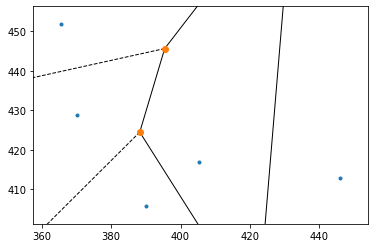

In [19]:
import matplotlib.pyplot as plt
voronoi_plot_2d(vor_objects[3])
plt.show()